# Splitting Data into Test-Train-Validation Sets

In [2]:
import csv
import argparse
import pandas as pd
import numpy as np
import os

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [3]:
batting_data_path = 'bsb_ref.csv'
# INFO:
# 101,332 Players with up to 20 features each (exluding year, including team)
# if metric not reported for player, set to 0.0 by default

df = pd.read_csv(batting_data_path)
df = df.fillna(0)

In [46]:
df_recent_players = df[df.year_ID >= 1975] #48k players
team_set = set(df_recent_players.team_ID)

ops_correlation = [] # this is a list of consecutive OPS+ scores

players = set(df_recent_players['name_common']) # just a set of all players

for player in players:
    # a list of all rows pertaining to a player
    player_stats = df_recent_players[df_recent_players['name_common'] == player]
    # this line is so that we can index by the retrieved list of players
    player_stats = player_stats.reset_index() 
    
    # iterate through all rows and store consecutive OPS+ in our list
    for index, player_row in  player_stats.iterrows():
        if index < len(player_stats) - 1:
            ops_correlation.append([player_stats.iloc[index]['OPS_plus'], player_stats.iloc[index + 1]['OPS_plus']])
ops = pd.DataFrame(ops_correlation, columns =['prev_ops', 'ops_to_predict']) 


[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [64.213, 78.2024], [78.2024, 88.5538], [88.5538, 70.6978], [70.6978, 104.2684], [104.2684, 103.3706], [103.3706, 70.631], [70.631, 32.6262], [32.6262, 95.4278], [95.4278, 39.013], [39.013, 78.4589], [21.4188, -13.4618], [-13.4618, -31.9393], [-31.9393, -25.0659], [-25.0659, 7.9908], [7.9908, 18.2393], [18.2393, -3.3897], [-3.3897, 5.4362], [5.4362, -8.729], [-8.729, 8.9137], [8.9137, 1.0458], [-29.4962, 14.8502], [14.8502, 8.5344], [8.5344, -4.1954], [-4.1954, -55.5284], [101.5962, 66.1286], [66.1286, 81.2932], [81.2932, 115.0667], [115.0667, 101.7657], [101.7657, 118.7464], [118.7464, 100.89], [100.89, 102.8773], [102.8773, 144.0002], [144.0002, 109.3274], [109.3274, 113.4907], [113.4907, 105.3231], [105.3231, 67.4648], [67.4648, 92.1586], [92.1586, 106.4849], [106.4849, 93.7997], [93.7997, 61.9381], [61.9381, 2.2465], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [72.9219, 135.1097], [135.1097, 128.1819], [128.1819, 97.6348], [97.634

In [50]:
x_data = ops['prev_ops'].values.reshape(-1,1)
y_data = ops['ops_to_predict'].values.reshape(-1,1)


In [51]:
reg = LinearRegression().fit(x_data, y_data)
print(reg.score(x_data, y_data))

0.17451814704694335


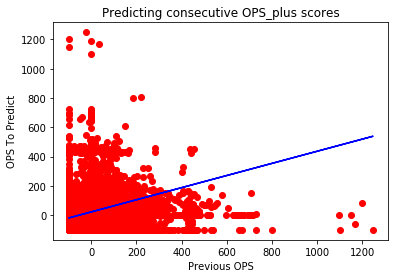

In [55]:
import matplotlib.pyplot as plot

linearRegressor = LinearRegression()
linearRegressor.fit(x_data, y_data)


plot.scatter(x_data, y_data, color = 'red')
plot.plot(x_data, linearRegressor.predict(x_data), color = 'blue')
plot.title('Predicting consecutive OPS_plus scores')
plot.xlabel('Previous OPS')
plot.ylabel('OPS To Predict')
plot.show()